# ANLY-590 Assignment 1
### Jiaxuan Sun - js4669

## Problem 1
<b>Regularization.</b> Using the accompanying Hitters dataset, we will explore regression models to predict a player’s Salary from other variables. You must python.
https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad

In [1]:
# load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# read raw data
hitters = pd.read_csv('Hitters.csv', sep = ',')
# first look of the data
hitters.head(5)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


### Data Preprocessing 

In [3]:
hitters.isna().sum()

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

<b>`Salary` column has some missing values need to be dropped</b>

In [4]:
# drop NaN from raw data
hitters_new = hitters.dropna()

### 1.1
Use `LASSO` regression to predict Salary from the other <b>numeric</b> predictors. Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [5]:
# drop categorical variables and target varible
hitters_df = hitters_new.drop(['Unnamed: 0','League','Division','NewLeague','Salary'],axis = 1)
x = hitters_df.astype('float64')
y = hitters_new['Salary']

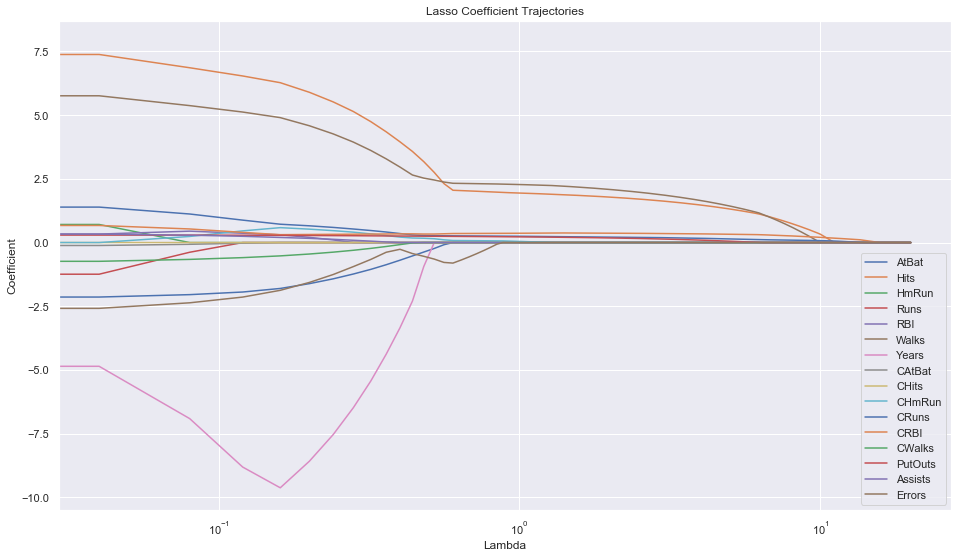

In [6]:
alphas = np.linspace(0,20,500)
lasso = Lasso(max_iter = 1e4, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(x,y)
    coefs.append(lasso.coef_)
    
sns.set(style="darkgrid")
plt.figure(num=None, figsize=(16, 9))    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.legend(x.columns,loc = 4)
plt.xlabel('Lambda')
plt.ylabel('Coefficient')
plt.title('Lasso Coefficient Trajectories')
plt.show()

<b>From above plot we can find that, when lambda is around 10 only three predictors are left.</b>

In [7]:
# check coefficients for predictors when lambda is 10
lasso = Lasso(max_iter = 1e4, normalize = True)
lasso.set_params(alpha = 10)
lasso.fit(x,y)
for col, coef in zip(x, lasso.coef_):
    print(col+':', coef)

AtBat: 0.0
Hits: 0.32947458556868225
HmRun: 0.0
Runs: 0.0
RBI: 0.0
Walks: 0.0
Years: 0.0
CAtBat: 0.0
CHits: 0.0
CHmRun: 0.0
CRuns: 0.07632196852894164
CRBI: 0.20447491636853793
CWalks: 0.0
PutOuts: 0.0
Assists: 0.0
Errors: 0.0


#### From above result we can find that the final three predictors that remain in the model are `Hits`, `CRuns` and `CRBI`.

### Find the optimal regularization penalty using cross validation.

In [8]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 1e5, normalize = True)
lassocv.fit(x,y)
lasso.set_params(alpha = lassocv.alpha_)
lassocv.alpha_

0.0635481759985745

In [9]:
lasso.fit(x,y)
pd.Series(lasso.coef_, index=x.columns)

AtBat     -2.082954
Hits       7.041011
HmRun      0.000000
Runs      -0.682615
RBI        0.496552
Walks      5.511781
Years     -6.107625
CAtBat    -0.087066
CHits      0.000000
CHmRun     0.156468
CRuns      1.228061
CRBI       0.583821
CWalks    -0.690601
PutOuts    0.292694
Assists    0.304372
Errors    -2.450795
dtype: float64

From above results we know that the optimal value of the regularization penality is <b>0.0636</b>. There are <b>12</b> predictors left in that model.

### 1.2
Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross-validation to find the optimal vaule of the regularization penalty.

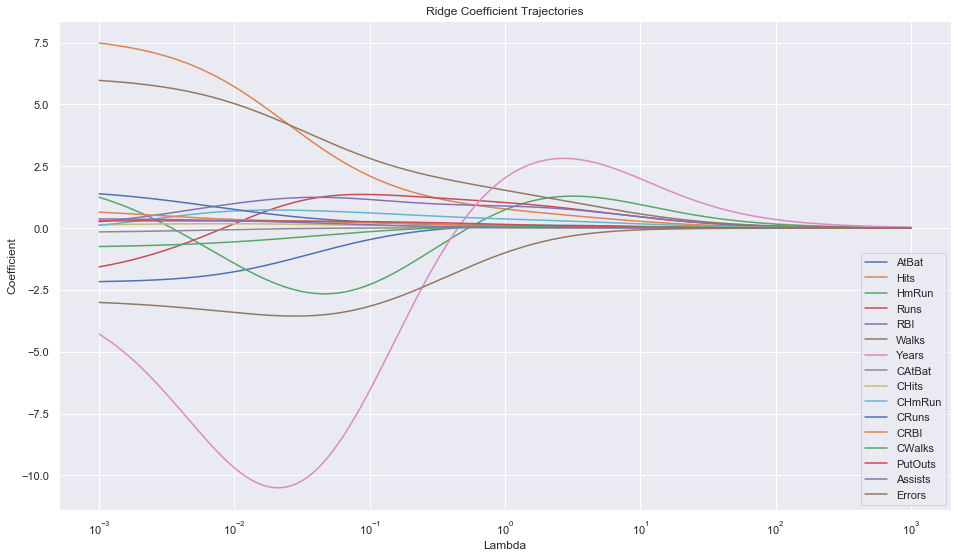

In [10]:
alphas = np.logspace(-3,3,1000)
ridge = Ridge(max_iter = 1e4, normalize = True)
coefs_ridge = []
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(x,y)
    coefs_ridge.append(ridge.coef_)
    
plt.figure(num=None, figsize=(16, 9))    
ax = plt.gca()
ax.plot(alphas, coefs_ridge)
ax.set_xscale('log')
ax.legend(x.columns,loc = 4)
plt.xlabel('Lambda')
plt.ylabel('Coefficient')
plt.title('Ridge Coefficient Trajectories')
plt.show()

### Find the optimal regularization penalty using cross validation.

In [11]:
ridgecv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridgecv.fit(x,y)
ridge.set_params(alpha = ridgecv.alpha_)
ridgecv.alpha_

0.9794696670695395

In [12]:
ridge.fit(x,y)
pd.Series(ridge.coef_, index=x.columns)

AtBat      0.092677
Hits       0.779048
HmRun      0.717110
Runs       1.039375
RBI        0.897415
Walks      1.540042
Years      1.992184
CAtBat     0.011254
CHits      0.053108
CHmRun     0.371456
CRuns      0.106962
CRBI       0.110625
CWalks     0.066541
PutOuts    0.150051
Assists    0.025306
Errors    -1.017433
dtype: float64

From above results we can find that the optimal vaule of the regularization penalty for Ridge regression is <b>0.98</b>. Because Ridge regression will only constrain coefficients of predictors to small value but not eliminate predictors, all the predictors are kept in the model.

### Problem 2
#### Short Answer. Explain in your own words the bias-variance tradeoff. 

The bias-variance tradeoff is an common but critical issue when building predict models. Bias-variance tradeoff is used to describe the relationship between model accuracy and robustness. If a very flexible model is built, that is the complexity of the model is high, then the model will have low bias and high accuracy. But because that kind of model fit on training data too close, it tend to have high variance. So the model's performance will significantly drop when fit on new data. That is overfitting problem. Therefore, it is important to find the balance point to make the model have relatively low bias and also relativly low variance.

#### What role does regularization play in this tradeoff? 

Regularization is a way to deal with overfitting problem. It reduces the variance of the model by using penalty parameter to limit the magnitude of coefficients.

#### Make reference to your findings in number (1) to describe models of high/low bias and variance.

For example, for above graphs, models on the left side of each graph where there is a low regularization weight have high-variance and low-bias. In the high-variance models, the coefficients take on larger and a much wider range of values. On the right side of each graph, the regularization weight constrains the models more and results in low-variance models with a much lower range of coefficients. With an optimal regularization weight, we can train a model that is less likely to overfit or underfit.